In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [2]:
#Data taken from 2020 census but as a csv
#Read the csv
state_pop_data = "../Resources/2020_population_by_state.csv"
state_pop_data_df = pd.read_csv(state_pop_data, encoding="ISO-8859-1")

In [3]:
#Read the CSV for all the state powerplants
state_generation_data = "../Output/All_States_by_source.csv"
state_generation_data_df = pd.read_csv(state_generation_data, encoding="ISO-8859-1", index_col=0)
#Select only useful columns
state_generation_data_df[["State", "Year", "Fuel Type", "Capacity (MWh)"]]

,State,Year,Fuel Type,Capacity (MWh)
0,AK,2021,Coal,168.9
1,AK,2021,Wind,59.0
2,AK,2021,Solar,0.8
3,AK,2021,Petroleum,742.7
4,AK,2021,Natural Gas,1273.1
...,...,...,...,...
8344,WY,1991,Petroleum,5.0
8345,WY,1990,Coal,5553.0
8346,WY,1990,Natural Gas,48.0
8347,WY,1990,Hydroelectric,270.0


In [4]:
#Read in CSV file for CO2 data by State (also taken from EIA)
state_price_data = "../Output/All_States_by_price.csv"
state_price_data_df = pd.read_csv(state_price_data, encoding="ISO-8859-1")
state_price_data_df

,Unnamed: 0,State,Year,Sector Name,Price (cents per kWh)
0,0,AK,2020,residential,22.57
1,1,AK,2019,residential,22.92
2,2,AK,2018,residential,21.94
3,3,AK,2017,residential,21.27
4,4,AK,2016,residential,20.30
...,...,...,...,...,...
1015,1015,WY,2005,residential,7.48
1016,1016,WY,2004,residential,7.21
1017,1017,WY,2003,residential,7.04
1018,1018,WY,2002,residential,6.97


In [5]:
#Sort the CO2 data to only include CO2 generated by electrical power generation
state_price_data_filtered_df = state_price_data_df.loc[state_price_data_df["Year"] == 2020].reset_index(drop = True)
state_price_data_filtered_df = state_price_data_filtered_df[["State", "Year", "Price (cents per kWh)"]]
state_price_data_filtered_df

,State,Year,Price (cents per kWh)
0,AK,2020,22.57
1,AL,2020,12.57
2,AR,2020,10.41
3,AZ,2020,12.27
4,CA,2020,20.45
5,CO,2020,12.36
6,CT,2020,22.71
7,DC,2020,12.63
8,DE,2020,12.56
9,FL,2020,11.27


In [6]:
state_price_data_filtered_df["Percentage Fossil Fuels"] = ""
state_price_data_filtered_df

,State,Year,Price (cents per kWh),Percentage Fossil Fuels
0,AK,2020,22.57,
1,AL,2020,12.57,
2,AR,2020,10.41,
3,AZ,2020,12.27,
4,CA,2020,20.45,
5,CO,2020,12.36,
6,CT,2020,22.71,
7,DC,2020,12.63,
8,DE,2020,12.56,
9,FL,2020,11.27,


In [7]:
#Only select 2020
state_generation_data_2020_df = state_generation_data_df.loc[state_generation_data_df["Year"] == 2020].reset_index(drop=True)
state_generation_data_2020_df

,State,Year,Fuel Type,Capacity (MWh)
0,AK,2020,Coal,168.9
1,AK,2020,Wind,59.8
2,AK,2020,Petroleum,739.9
3,AK,2020,Natural Gas,1273.1
4,AK,2020,Hydroelectric,470.6
...,...,...,...,...
310,WY,2020,Wind,2504.9
311,WY,2020,Solar,92.0
312,WY,2020,Petroleum,5.8
313,WY,2020,Natural Gas,604.2


In [8]:
#Generate a list of the states
states = state_generation_data_2020_df["State"].unique()
#Create two empty lists - one to store the total generation capacity of each state
# and the other to share the generation capacity of non-renewable sources only for each state
total_capacity = []
nonrenewable_capacity = []
# Run through each state

for state in states:
    #Reset a counter which will add up the totals by state each time
    nonrenewables = 0
    total = 0
    #For each row in the electricity generation dataframe:
    for index, row in state_generation_data_2020_df.iterrows():
        #Select rows only that match the state we're looking at
        if state_generation_data_2020_df.loc[index, "State"] == state:
            #Select only the fossil fuel sources
            if ((state_generation_data_2020_df.loc[index, "Fuel Type"] == "Coal") | 
                (state_generation_data_2020_df.loc[index, "Fuel Type"] == "Natural Gas") |
                (state_generation_data_2020_df.loc[index, "Fuel Type"] == "Petroleum")):
                    #Add the totals of the non-renewables capacity together for each state 
                    nonrenewables = nonrenewables + state_generation_data_2020_df.loc[index, "Capacity (MWh)"]
            #And calculate the total capacity for each state
            total = total + state_generation_data_2020_df.loc[index, "Capacity (MWh)"]
            
    #Add both of these numbers to the empty list created earlier
    nonrenewable_capacity.append(nonrenewables)
    total_capacity.append(total)


In [9]:
nonrenewables_percent = []
for i in range (len(total_capacity)):
    #Calculate the percentage of electricity generated by non-renewable sources for each state
    percentnonrenewable = round(((nonrenewable_capacity[i])/(total_capacity[i]))*100,2)
    nonrenewables_percent.append(percentnonrenewable)
    
nonrenewables_percent

[80.44,
 67.86,
 77.35,
 63.87,
 51.95,
 64.22,
 76.54,
 68.9,
 98.8,
 87.57,
 75.99,
 78.48,
 46.08,
 21.95,
 59.11,
 87.6,
 52.39,
 93.37,
 90.16,
 87.57,
 79.03,
 57.82,
 72.9,
 59.07,
 81.98,
 88.68,
 36.49,
 63.97,
 50.48,
 62.84,
 53.59,
 73.53,
 62.78,
 64.71,
 70.1,
 88.01,
 63.94,
 22.86,
 75.17,
 87.84,
 56.64,
 30.6,
 62.51,
 68.19,
 79.2,
 76.18,
 17.75,
 13.59,
 84.31,
 92.71,
 69.7]

In [10]:
#Input that data to the state CO2 dataframe
state_price_data_filtered_df["Percentage Fossil Fuels"] = nonrenewables_percent
state_price_data_filtered_df

,State,Year,Price (cents per kWh),Percentage Fossil Fuels
0,AK,2020,22.57,80.44
1,AL,2020,12.57,67.86
2,AR,2020,10.41,77.35
3,AZ,2020,12.27,63.87
4,CA,2020,20.45,51.95
5,CO,2020,12.36,64.22
6,CT,2020,22.71,76.54
7,DC,2020,12.63,68.90
8,DE,2020,12.56,98.80
9,FL,2020,11.27,87.57


The r-value for this is 0.12484100616529581


<function matplotlib.pyplot.show(*args, **kw)>

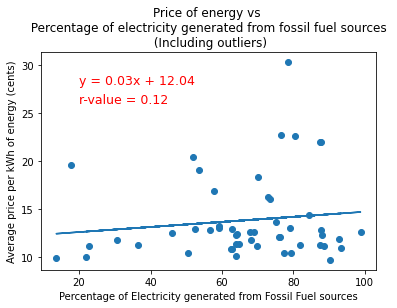

In [11]:
#Plot the percentage of electricity generated by fossil fuels for each state
#Against the CO2 emissions per capita in that state

x_values = state_price_data_filtered_df["Percentage Fossil Fuels"]
y_values = state_price_data_filtered_df["Price (cents per kWh)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(20,28),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (20, 26), fontsize = 12.5, color = "red")
plt.xlabel("Percentage of Electricity generated from Fossil Fuel sources")
plt.ylabel("Average price per kWh of energy (cents)")
plt.title("Price of energy vs \n Percentage of electricity generated from fossil fuel sources \n (Including outliers)")
print(f"The r-value for this is {rvalue}")

plt.savefig("../Output/Images/State_Electricity_Cost_against_%fossilfuels(Inc_Outliers).png")
plt.show


In [12]:
#Determing outliers
quartiles = state_price_data_filtered_df["Price (cents per kWh)"].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_df = state_price_data_filtered_df.loc[(state_price_data_filtered_df["Price (cents per kWh)"] < lower_bound) | (state_price_data_filtered_df["Price (cents per kWh)"] > upper_bound)]
print(outliers_df["State"])
print(f"The upper bound is {upper_bound}")
print(f"The lower bound is {lower_bound}")

0     AK
4     CA
6     CT
11    HI
19    MA
30    NH
34    NY
39    RI
46    VT
Name: State, dtype: object
The upper bound is 18.082499999999996
The lower bound is 7.062500000000002


In [13]:
#Removing the Outliers
state_price_data_filtered_without_outliers_df = state_price_data_filtered_df.loc[(state_price_data_filtered_df["Price (cents per kWh)"] < upper_bound) & (state_price_data_filtered_df["Price (cents per kWh)"] > 0)]
state_price_data_filtered_without_outliers_df

,State,Year,Price (cents per kWh),Percentage Fossil Fuels
1,AL,2020,12.57,67.86
2,AR,2020,10.41,77.35
3,AZ,2020,12.27,63.87
5,CO,2020,12.36,64.22
7,DC,2020,12.63,68.90
8,DE,2020,12.56,98.80
9,FL,2020,11.27,87.57
10,GA,2020,12.02,75.99
12,IA,2020,12.46,46.08
13,ID,2020,9.95,21.95


The r-value for this is 0.1606075525540173


<function matplotlib.pyplot.show(*args, **kw)>

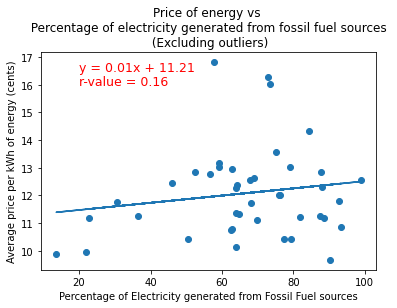

In [14]:
#Plot the percentage of electricity generated by fossil fuels for each state
#Against the CO2 emissions per capita in that state

x_values = state_price_data_filtered_without_outliers_df["Percentage Fossil Fuels"]
y_values = state_price_data_filtered_without_outliers_df["Price (cents per kWh)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(20,16.5),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (20, 16), fontsize = 12.5, color = "red")
plt.xlabel("Percentage of Electricity generated from Fossil Fuel sources")
plt.ylabel("Average price per kWh of energy (cents)")
plt.title("Price of energy vs \n Percentage of electricity generated from fossil fuel sources \n (Excluding outliers)")
print(f"The r-value for this is {rvalue}")

plt.savefig("../Output/Images/State_Electricity_Cost_against_%fossilfuels(Exc_Outliers).png")
plt.show


In [15]:
state_price_data_filtered_df["Total Energy Capacity (MWh)"] = total_capacity
state_price_data_filtered_df

,State,Year,Price (cents per kWh),Percentage Fossil Fuels,Total Energy Capacity (MWh)
0,AK,2020,22.57,80.44,2712.3
1,AL,2020,12.57,67.86,28099.5
2,AR,2020,10.41,77.35,14558.3
3,AZ,2020,12.27,63.87,26828.5
4,CA,2020,20.45,51.95,72107.0
5,CO,2020,12.36,64.22,17001.2
6,CT,2020,22.71,76.54,10045.3
7,DC,2020,12.63,68.90,29.9
8,DE,2020,12.56,98.80,3225.2
9,FL,2020,11.27,87.57,60330.4


In [16]:
state_pop_data_df

,ï»¿state,Population
0,AK,733391
1,AL,5024279
2,AR,3011524
3,AZ,7151502
4,CA,39538233
5,CO,5773714
6,CT,3605944
7,DC,689545
8,DE,989948
9,FL,21538187


In [17]:
state_price_data_filtered_df["Total Energy Capacity per person (kWh)"] = (total_capacity)/(state_pop_data_df["Population"])*1000
state_price_data_filtered_df

,State,Year,Price (cents per kWh),Percentage Fossil Fuels,Total Energy Capacity (MWh),Total Energy Capacity per person (kWh)
0,AK,2020,22.57,80.44,2712.3,3.698300
1,AL,2020,12.57,67.86,28099.5,5.592743
2,AR,2020,10.41,77.35,14558.3,4.834197
3,AZ,2020,12.27,63.87,26828.5,3.751450
4,CA,2020,20.45,51.95,72107.0,1.823728
5,CO,2020,12.36,64.22,17001.2,2.944586
6,CT,2020,22.71,76.54,10045.3,2.785762
7,DC,2020,12.63,68.90,29.9,0.043362
8,DE,2020,12.56,98.80,3225.2,3.257949
9,FL,2020,11.27,87.57,60330.4,2.801090


The r-value for this is -0.24297181205022167


<function matplotlib.pyplot.show(*args, **kw)>

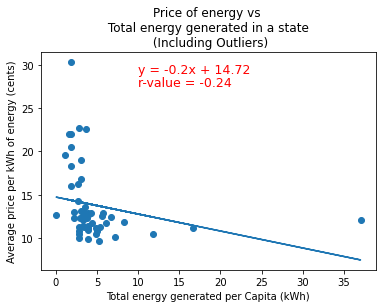

In [23]:
#Plot the total electricity generated by each state
#Against the price per kWh in the state

x_values = state_price_data_filtered_df["Total Energy Capacity per person (kWh)"]
y_values = state_price_data_filtered_df["Price (cents per kWh)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(10,29),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (10, 27.5), fontsize = 12.5, color = "red")
plt.xlabel("Total energy generated per Capita (kWh)")
plt.ylabel("Average price per kWh of energy (cents)")
plt.title("Price of energy vs \n Total energy generated in a state \n (Including Outliers)")
print(f"The r-value for this is {rvalue}")

plt.savefig("../Output/Images/State_Electricity_Cost_against_Total_Energy(Inc_Outliers).png")
plt.show


In [19]:
#Determing outliers
quartiles = state_price_data_filtered_df["Price (cents per kWh)"].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_df = state_price_data_filtered_df.loc[(state_price_data_filtered_df["Price (cents per kWh)"] < lower_bound) | (state_price_data_filtered_df["Price (cents per kWh)"] > upper_bound)]
print(outliers_df["State"])
print(f"The upper bound is {upper_bound}")
print(f"The lower bound is {lower_bound}")

0     AK
4     CA
6     CT
11    HI
19    MA
30    NH
34    NY
39    RI
46    VT
Name: State, dtype: object
The upper bound is 18.082499999999996
The lower bound is 7.062500000000002


In [20]:
#Removing the Outliers
state_price_data_filtered_without_outliers_df = state_price_data_filtered_df.loc[(state_price_data_filtered_df["Price (cents per kWh)"] < upper_bound) & (state_price_data_filtered_df["Price (cents per kWh)"] > 0)]
state_price_data_filtered_without_outliers_df

,State,Year,Price (cents per kWh),Percentage Fossil Fuels,Total Energy Capacity (MWh),Total Energy Capacity per person (kWh)
1,AL,2020,12.57,67.86,28099.5,5.592743
2,AR,2020,10.41,77.35,14558.3,4.834197
3,AZ,2020,12.27,63.87,26828.5,3.751450
5,CO,2020,12.36,64.22,17001.2,2.944586
7,DC,2020,12.63,68.90,29.9,0.043362
8,DE,2020,12.56,98.80,3225.2,3.257949
9,FL,2020,11.27,87.57,60330.4,2.801090
10,GA,2020,12.02,75.99,34326.1,3.288133
12,IA,2020,12.46,46.08,21311.2,6.679854
13,ID,2020,9.95,21.95,5111.6,2.779394


The r-value for this is -0.15486932521804525


<function matplotlib.pyplot.show(*args, **kw)>

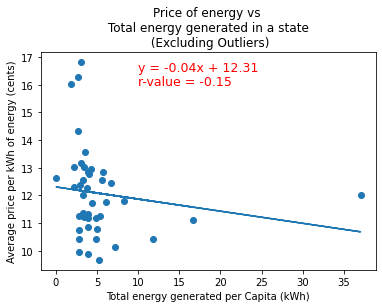

In [21]:
#Plot the total electricity generated by each state
#Against the price per kWh in the state

x_values = state_price_data_filtered_without_outliers_df["Total Energy Capacity per person (kWh)"]
y_values = state_price_data_filtered_without_outliers_df["Price (cents per kWh)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(10,16.5),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (10, 16), fontsize = 12.5, color = "red")
plt.xlabel("Total energy generated per Capita (kWh)")
plt.ylabel("Average price per kWh of energy (cents)")
plt.title("Price of energy vs \n Total energy generated in a state \n (Excluding Outliers)")
print(f"The r-value for this is {rvalue}")

plt.savefig("../Output/Images/State_Electricity_Cost_against_Total_Energy(Exc_Outliers).png")
plt.show
